<a href="https://colab.research.google.com/github/Romeolive/Class-11B/blob/master/Rolling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/BTC-USD.csv', parse_dates=['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


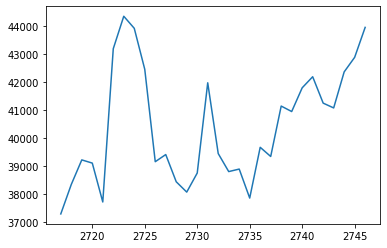

In [ ]:
data.Open.iloc[-30:].plot()

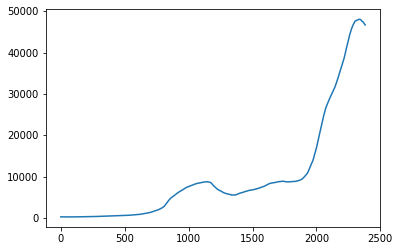

In [ ]:
means = []
window = 365
for i in range(len(data) - window):
  mean = data.Open.iloc[i:i+window].mean()
  means.append(mean)
means = pd.Series(means)
means.plot()

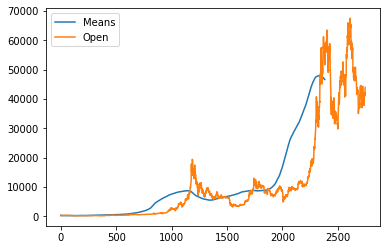

In [ ]:
means.plot(label="Means")
data.Open.plot(label="Open")
plt.legend()

In [ ]:
data.rolling(30).Open.mean()

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2742    39883.427474
2743    39915.294271
2744    40046.666537
2745    40240.595964
2746    40429.709115
Name: Open, Length: 2747, dtype: float64

In [ ]:
data.Open.rolling(30).mean()

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2742    39883.427474
2743    39915.294271
2744    40046.666537
2745    40240.595964
2746    40429.709115
Name: Open, Length: 2747, dtype: float64

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/disruptions.csv')
data['BeganAt'] = data['Date Event Began'] + ' ' + data['Time Event Began']
data['RestoredAt'] = data['Date of Restoration'] + ' ' + data['Time of Restoration']

data.drop(
    columns=['Date Event Began', 'Time Event Began', 'Date of Restoration', 'Time of Restoration', 'Year', 'NERC Region'],
    inplace=True,
)
data['BeganAt'] = pd.to_datetime(data['BeganAt'])
data['RestoredAt'] = pd.to_datetime(data['RestoredAt'])

# data = data[(data['RestoredAt'] - data['BeganAt']).dt.total_seconds() > 0]

data.head()

,Event Description,Respondent,Geographic Areas,Demand Loss (MW),Number of Customers Affected,Tags,BeganAt,RestoredAt
0,Severe Weather - Thunderstorms,Exelon Corporation/ComEd,Illinois,Unknown,"420,000","severe weather, thunderstorm",2014-06-30 20:00:00,2014-07-02 18:30:00
1,Severe Weather - Thunderstorms,Northern Indiana Public Service Company,North Central Indiana,Unknown,"127,000","severe weather, thunderstorm",2014-06-30 23:20:00,2014-07-01 17:00:00
2,Severe Weather - Thunderstorms,We Energies,Southeast Wisconsin,424,"120,000","severe weather, thunderstorm",2014-06-30 17:55:00,2014-07-01 02:53:00
3,Physical Attack - Vandalism,Tennessee Valley Authority,"Nashville, Tennessee",Unknown,Unknown,"vandalism, physical",2014-06-24 14:54:00,2014-06-24 14:55:00
4,Physical Attack - Vandalism,Tennessee Valley Authority,"Nashville, Tennessee",Unknown,Unknown,"vandalism, physical",2014-06-19 08:47:00,2014-06-19 08:48:00


In [ ]:
data.rolling(30)['Event Description'].count()

/usr/local/lib/python3.7/dist-packages/pandas/core/window/rolling.py:1631: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  FutureWarning,


0       1.0
1       2.0
2       3.0
3       4.0
4       5.0
       ... 
972    30.0
973    30.0
974    30.0
975    30.0
976    30.0
Name: Event Description, Length: 977, dtype: float64

In [ ]:
data.index = data.BeganAt
data.head()

,Event Description,Respondent,Geographic Areas,Demand Loss (MW),Number of Customers Affected,Tags,BeganAt,RestoredAt
BeganAt,,,,,,,,
2014-06-30 20:00:00,Severe Weather - Thunderstorms,Exelon Corporation/ComEd,Illinois,Unknown,"420,000","severe weather, thunderstorm",2014-06-30 20:00:00,2014-07-02 18:30:00
2014-06-30 23:20:00,Severe Weather - Thunderstorms,Northern Indiana Public Service Company,North Central Indiana,Unknown,"127,000","severe weather, thunderstorm",2014-06-30 23:20:00,2014-07-01 17:00:00
2014-06-30 17:55:00,Severe Weather - Thunderstorms,We Energies,Southeast Wisconsin,424,"120,000","severe weather, thunderstorm",2014-06-30 17:55:00,2014-07-01 02:53:00
2014-06-24 14:54:00,Physical Attack - Vandalism,Tennessee Valley Authority,"Nashville, Tennessee",Unknown,Unknown,"vandalism, physical",2014-06-24 14:54:00,2014-06-24 14:55:00
2014-06-19 08:47:00,Physical Attack - Vandalism,Tennessee Valley Authority,"Nashville, Tennessee",Unknown,Unknown,"vandalism, physical",2014-06-19 08:47:00,2014-06-19 08:48:00


In [ ]:
data.sort_index(inplace=True)

In [ ]:
data.rolling('30d')['Event Description'].count()

BeganAt
2000-01-29 22:00:00     1.0
2000-03-18 16:00:00     1.0
2000-03-18 19:08:00     2.0
2000-06-14 15:54:00     1.0
2000-06-28 17:52:00     2.0
                       ... 
2014-06-19 08:47:00    13.0
2014-06-24 14:54:00    13.0
2014-06-30 17:55:00    13.0
2014-06-30 20:00:00    14.0
2014-06-30 23:20:00    15.0
Name: Event Description, Length: 977, dtype: float64

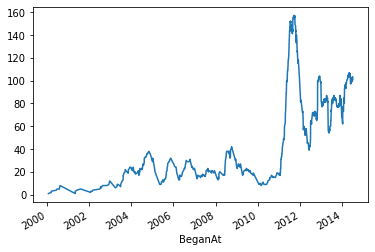

In [ ]:
data.rolling('180d')['Geographic Areas'].apply.plot()

In [ ]:
data = pd.read_csv('https://github.com/bykov-alexei/data-science-course/raw/master/Pandas/BTC-USD.csv',parse_dates=['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
data.rolling(50).Open.mean().idmax()

AttributeError: ignored

In [ ]:
data[
    (data.Date.dt.year == 2019) & (data.Date.dt.day == 30) & (data.Date.dt.month == 10) 
]
data.rolling(50)['Open'].max()


AttributeError: ignored

In [ ]:
data.rolling(200).Open.max()

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2742    67549.734375
2743    67549.734375
2744    67549.734375
2745    67549.734375
2746    67549.734375
Name: Open, Length: 2747, dtype: float64

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/Backery%20Sales2.csv')
data.head(5)

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-10-02 11:58:00,Wed,19300.0,석사동,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-10-02 12:35:00,Wed,15500.0,후평 3동,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2019-10-02 14:16:00,Wed,17000.0,후평 3동,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2019-10-02 14:18:00,Wed,16000.0,후평 2동,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-10-02 15:57:00,Wed,24500.0,동면,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0


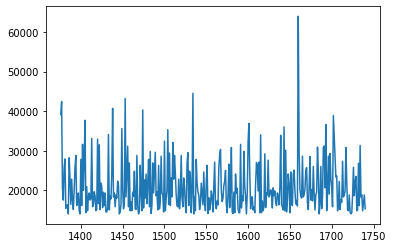

In [ ]:

data.total.iloc[-365:].plot()

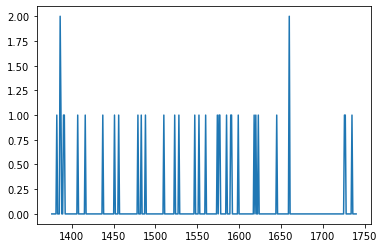

In [ ]:
data['gateau chocolat'].iloc[-365:].plot()

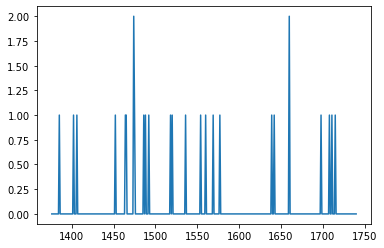

In [ ]:
data.jam.iloc[-365:].plot()

In [ ]:
data.index = data.Date

In [ ]:
data.rolling(50).Open.mean()['30-10-2019']

8864.48310546

In [ ]:
data.rolling(200).Open.mean()['2016-05-02']

396.506100385

In [ ]:
data.rolling(50).Open.mean().idmax()

AttributeError: ignored

In [ ]:
data = pd.read_csv('https://github.com/bykov-alexei/data-science-course/raw/master/Pandas/BTC-USD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
data.index = data.Date
data.rolling(200).Open.mean().idxmax()

'2022-02-20'